# Tutorial: monitoring networks

This tutorial covers what information is available about monitoring networks.

We will download the relevant data using this package (python-sa-gwdata) -- importable as ``sa_gwdata`` -- and use some other packages for other things:

- matplotlib, numpy, pandas - used in the background

In [11]:
import sa_gwdata

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx

This step is optional:

You can specify the working coordinate reference system (CRS). I'm going to use [SA Lambert GDA2020](https://epsg.io/8059), which is in eastings and northings and covers the whole state. You can pick any!

In [12]:
session = sa_gwdata.get_global_session(working_crs="EPSG:8059")

This variable (``session``), you can either use, or ignore. If you use the module-level functions as shown below, the package will use ``session`` in the background. There are some subtle differences which you can see more information about HERE (TODO)

## Get a list of monitoring networks

In [13]:
session.networks

{'AW_NP': 'Alinytjara Wilurara Non-Prescribed Area',
 'ANGBRM': 'Angas Bremer PWA',
 'BAROOTA': 'Baroota PWRA',
 'BAROSS_IRR': 'Barossa irrigation wells salinity monitoring',
 'BAROSSA': 'Barossa PWRA',
 'BERI_REN': 'Berri and Renmark Irrigation Areas',
 'BOT_GDNS': 'Botanic Gardens wetlands',
 'CENT_ADEL': 'Central Adelaide PWA',
 'CHOWILLA': 'Chowilla Floodplain',
 'CLARE': 'Clare PWRA',
 'EMLR': 'Eastern Mount Lofty Ranges PWRA',
 'EP_NP': 'Eyre Peninsula Non-Prescribed Area',
 'FAR NORTH': 'Far North PWA',
 'GG_EIZ': 'Golden Grove extractive indust zone',
 'KANGFLAT': 'Kangaroo Flat irrigation wells salinity monitoring',
 'KI_NP': 'Kangaroo Island Non-Prescribed Area',
 'KAT_FP': 'Katarapko Floodplain',
 'LEIGHCK': 'Leigh Creek',
 'LLC_NTH': 'Lower Limestone Coast PWA_North',
 'LLC_STH': 'Lower Limestone Coast PWA_South',
 'LOXTON': 'Loxton - Bookpurnong Irrigation Areas',
 'MALLEE': 'Mallee PWA',
 'MARLA': 'Marla Township',
 'MARNE': 'Marne River and Saunders Creek PWRA',
 'MV_IRR

## Download wells in the network

Let's look at the status of monitoring wells in McLaren Vale PWA

In [14]:
wells = sa_gwdata.search_by_network('MCL_VALE')

The monitoring status of a well is conveyed in these columns:

- **swlstatus**: water level monitoring status. C = currently monitored
- **salstatus**: salinity monitoring status. C = currently monitored

"H" means historic i.e. was monitored once, and probably has some data, but not currently monitored.

"N" means "not monitored", so a similar meaning to "H", in effect.

In [15]:
wells[['obsnumber', 'obsnetwork', 'swlstatus', 'salstatus']]

,obsnumber,obsnetwork,swlstatus,salstatus
0,WLG036,MCL_VALE,N,H
1,WLG035,MCL_VALE,N,H
2,WLG039,MCL_VALE,H,H
3,WLG038,MCL_VALE,C,H
4,WLG040,MCL_VALE,H,H
...,...,...,...,...
150,WLG156,MCL_VALE,C,N
151,WLG157,MCL_VALE,C,N
152,WLG158,MCL_VALE,C,N
153,NaN,MCL_VALE,N,N


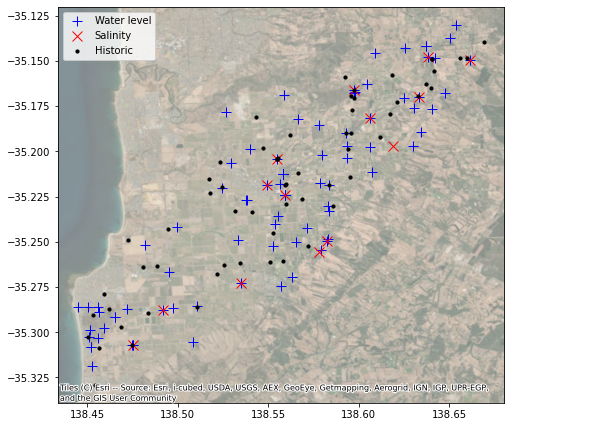

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
wells[wells.swlstatus == 'C'].geometry.plot(color='b', lw=1, marker='+', markersize=100, label='Water level', ax=ax)
wells[wells.salstatus == 'C'].geometry.plot(color='r', lw=1, marker='x', markersize=100, label='Salinity', ax=ax)
historic = (wells.swlstatus != "C") & (wells.salstatus != "C")
wells[historic].geometry.plot(color='k', marker='o', markersize=10, label='Historic', ax=ax)
ax.legend()

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=session.working_crs, alpha=0.5)

## Download more than one network at once

Let's now download all the Adelaide Plains monitoring networks in one go, and colour the wells by the network they are in.

In [17]:
wells = sa_gwdata.search_by_network(
    'NAP', 'NAP_LIC', 'NAP_PERCH', 'CENT_ADEL', 'GG_EIZ', 'STKILD_MAN', 'KANGFLAT'
)

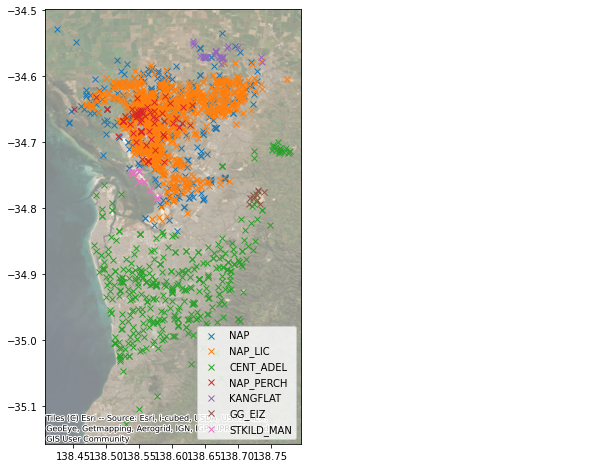

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

for network in wells.obsnetwork.unique():
    wells[wells.obsnetwork == network].geometry.plot(marker='x', lw=1, ax=ax, label=network)
    
ax.legend()
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=session.working_crs, alpha=0.5)